In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

base_path = '/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 1 Out'
file_names = ["PtExp.csv", "Process.csv", "Outcome_readmission.csv", "Outcome_safety.csv", "Outcome_mortality.csv"]
target_ids = [490037, 490052, 490130, 490143]

# Convert target_ids to strings for comparison
target_ids = list(map(str, target_ids))

for file_name in file_names:
    file_path = os.path.join(base_path, file_name)
    try:
        # Load the file
        df = pd.read_csv(file_path)
        print(f"\nProcessing {file_name}...")

        # Convert PROVIDER_ID to string
        if "PROVIDER_ID" in df.columns:
            df["PROVIDER_ID"] = df["PROVIDER_ID"].astype(str)

        # Ensure necessary columns exist
        if "PROVIDER_ID" in df.columns and "grp_score" in df.columns:
            # Drop rows with missing grp_score
            non_nan_count = df["grp_score"].notna().sum()
            df = df.dropna(subset=["grp_score"])

            # Rank by grp_score (descending order)
            df["Rank"] = df["grp_score"].rank(method="min", ascending=False)

            # Add "...of xxxx" to the Rank column
            df["Rank"] = df["Rank"].apply(lambda x: f"{int(x)} of {non_nan_count}")

            # Filter for the target provider IDs
            ranked_providers = df[df["PROVIDER_ID"].isin(target_ids)]

            if not ranked_providers.empty:
                print(f"Rankings for {file_name}:\n{ranked_providers[['PROVIDER_ID', 'grp_score', 'Rank']]}")
            else:
                print(f"No matching PROVIDER_IDs found in {file_name}.")
        else:
            print(f"Missing 'PROVIDER_ID' or 'grp_score' in {file_name}.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")



Processing PtExp.csv...
Rankings for PtExp.csv:
     PROVIDER_ID  grp_score          Rank
4199      490037   0.340154  1211 of 3231
4210      490052   0.214651  1344 of 3231
4249      490130   0.857175   667 of 3231
4253      490143   0.783366   719 of 3231

Processing Process.csv...
Rankings for Process.csv:
     PROVIDER_ID  grp_score          Rank
4199      490037   1.087315   496 of 4588
4210      490052   0.545521  1242 of 4588
4249      490130   0.978483   613 of 4588
4253      490143   1.181454   419 of 4588

Processing Outcome_readmission.csv...
Rankings for Outcome_readmission.csv:
     PROVIDER_ID  grp_score          Rank
4199      490037  -0.062829  2486 of 4387
4210      490052  -0.378694  3083 of 4387
4249      490130  -0.150489  2664 of 4387
4253      490143  -0.036087  2432 of 4387

Processing Outcome_safety.csv...
Rankings for Outcome_safety.csv:
     PROVIDER_ID  grp_score          Rank
4199      490037   0.616953   723 of 3458
4210      490052   0.590496   762 of 345

# Mort and READM heat map

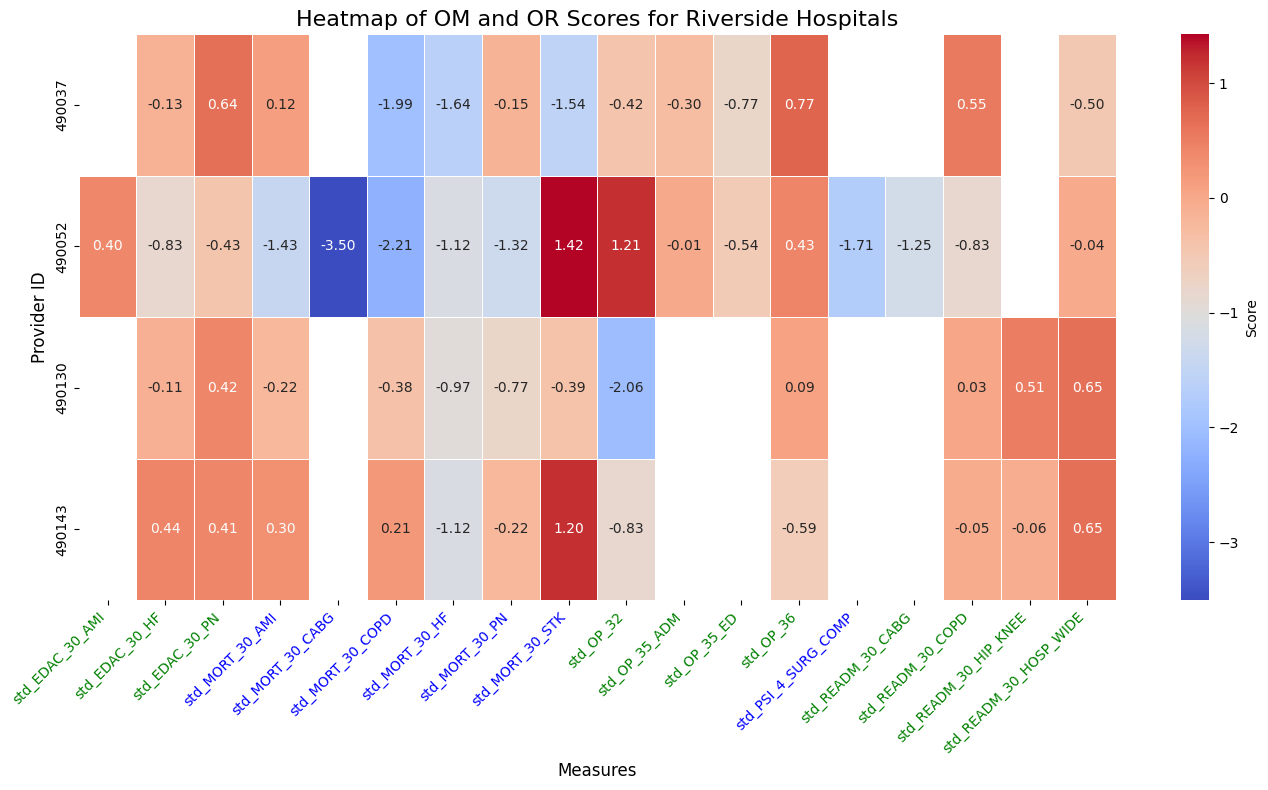

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 0 Out/Std_data_2024Jul_analysis.csv"

# Columns for OM and OR measures
measure_OM = ['std_MORT_30_AMI', 'std_MORT_30_CABG', 'std_MORT_30_COPD', 'std_MORT_30_HF',
              'std_MORT_30_PN', 'std_MORT_30_STK', 'std_PSI_4_SURG_COMP']

measure_OR = ['std_EDAC_30_AMI', 'std_EDAC_30_HF', 'std_EDAC_30_PN', 'std_OP_32',
              'std_READM_30_CABG', 'std_READM_30_COPD', 'std_READM_30_HIP_KNEE',
              'std_READM_30_HOSP_WIDE', 'std_OP_35_ADM', 'std_OP_35_ED', 'std_OP_36']

# Riverside CCNs
riverside_ccns = ["490037", "490052", "490130", "490143"]

# Read the file
data = pd.read_csv(file_path)

# Ensure PROVIDER_ID is treated as a string
data['PROVIDER_ID'] = data['PROVIDER_ID'].astype(str)

# Filter for OM and OR columns and the specified CCNs
filtered_data = data[data['PROVIDER_ID'].isin(riverside_ccns)][['PROVIDER_ID'] + measure_OM + measure_OR]

# Melt the DataFrame for visualization
melted_data = filtered_data.melt(id_vars=['PROVIDER_ID'], var_name='Measure', value_name='Score')

# Add a column to differentiate between OM and OR
melted_data['Category'] = melted_data['Measure'].apply(lambda x: 'OM' if x in measure_OM else 'OR')

# Pivot for heatmap
heatmap_data = melted_data.pivot(index='PROVIDER_ID', columns='Measure', values='Score')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

# Highlight OM and OR columns
plt.title('Heatmap of OM and OR Scores for Riverside Hospitals', fontsize=16)
plt.xlabel('Measures', fontsize=12)
plt.ylabel('Provider ID', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add color or annotation to differentiate OM and OR
for i, col in enumerate(heatmap_data.columns):
    if col in measure_OM:
        plt.gca().get_xticklabels()[i].set_color("blue")  # OM columns in blue
    elif col in measure_OR:
        plt.gca().get_xticklabels()[i].set_color("green")  # OR columns in green

plt.tight_layout()
plt.show()


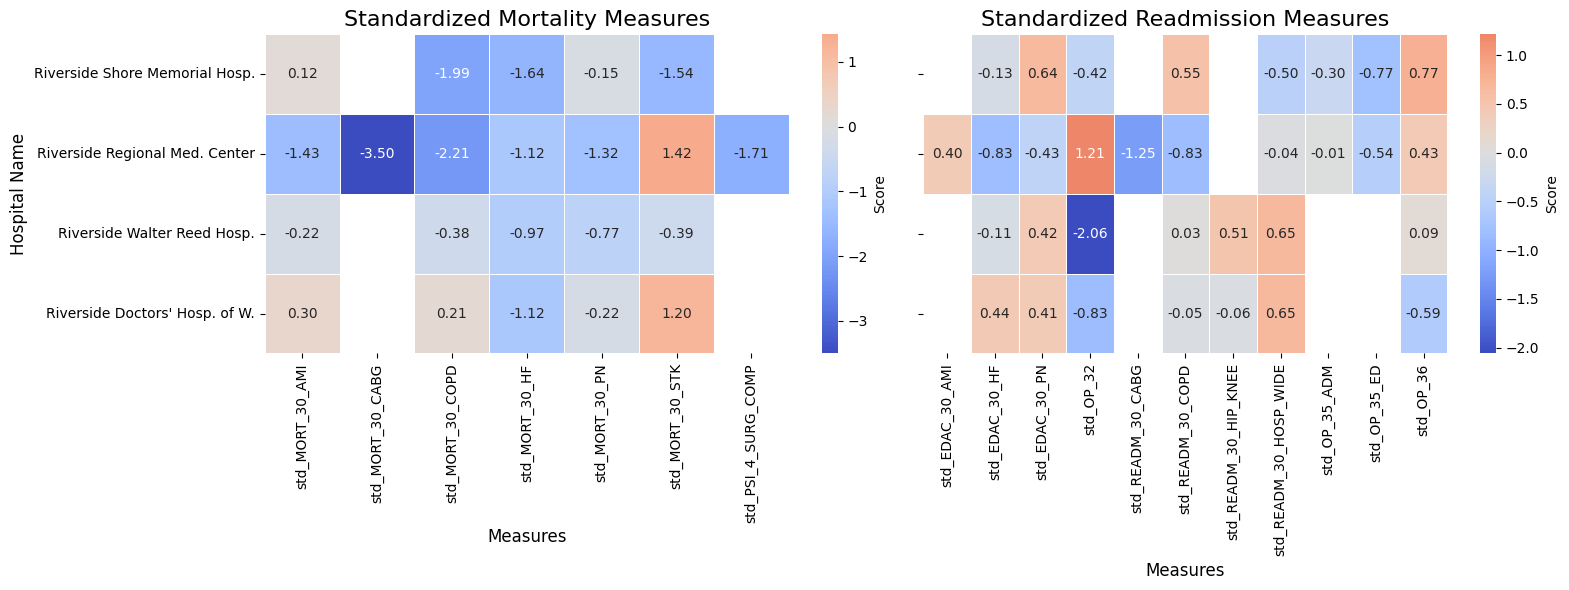

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path
file_path = "/content/drive/My Drive/Capstone Project/SAS Star Data/Source Code/output/Step 0 Out/Std_data_2024Jul_analysis.csv"

# Columns for OM and OR measures
measure_OM = ['std_MORT_30_AMI', 'std_MORT_30_CABG', 'std_MORT_30_COPD', 'std_MORT_30_HF',
              'std_MORT_30_PN', 'std_MORT_30_STK', 'std_PSI_4_SURG_COMP']

measure_OR = ['std_EDAC_30_AMI', 'std_EDAC_30_HF', 'std_EDAC_30_PN', 'std_OP_32',
              'std_READM_30_CABG', 'std_READM_30_COPD', 'std_READM_30_HIP_KNEE',
              'std_READM_30_HOSP_WIDE', 'std_OP_35_ADM', 'std_OP_35_ED', 'std_OP_36']

# Riverside CCNs and their corresponding hospital names (shortened names)
riverside_hospitals = {
    "490037": "Riverside Shore Memorial Hosp.",
    "490052": "Riverside Regional Med. Center",
    "490130": "Riverside Walter Reed Hosp.",
    "490143": "Riverside Doctors' Hosp. of W."
}

# Read the file
data = pd.read_csv(file_path)

# Ensure PROVIDER_ID is treated as a string
data['PROVIDER_ID'] = data['PROVIDER_ID'].astype(str)

# Filter for OM and OR columns and the specified CCNs
filtered_data = data[data['PROVIDER_ID'].isin(riverside_hospitals.keys())][['PROVIDER_ID'] + measure_OM + measure_OR]

# Replace CCN with hospital names
filtered_data['PROVIDER_ID'] = filtered_data['PROVIDER_ID'].map(riverside_hospitals)

# Split the data into two DataFrames for OM and OR measures
heatmap_data_OM = filtered_data[['PROVIDER_ID'] + measure_OM].set_index('PROVIDER_ID')
heatmap_data_OR = filtered_data[['PROVIDER_ID'] + measure_OR].set_index('PROVIDER_ID')

# Create the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Reduced width for better spacing

# Mortality Heatmap
sns.heatmap(
    heatmap_data_OM,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Score'},
    ax=axes[0]
)
axes[0].set_title('Standardized Mortality Measures', fontsize=16)
axes[0].set_xlabel('Measures', fontsize=12)
axes[0].set_ylabel('Hospital Name', fontsize=12)
axes[0].tick_params(axis='x', labelrotation=90)  # Make x-axis labels vertical

# Readmission Heatmap
sns.heatmap(
    heatmap_data_OR,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Score'},
    ax=axes[1]
)
axes[1].set_title('Standardized Readmission Measures', fontsize=16)
axes[1].set_xlabel('Measures', fontsize=12)
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].tick_params(axis='x', labelrotation=90)  # Restore x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()
